# Setup

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [2]:
# Create directories
if os.path.exists('data'):
    data_path = os.path.join(os.getcwd(), 'data')
else:
    os.mkdir('data')

if os.path.exists('plot'):
    plot_path = os.path.join(os.getcwd(), 'plot')
else:
    os.mkdir('plot')

if os.path.exists('result'):
    result_path = os.path.join(os.getcwd(), 'result')
else:
    os.mkdir('result')

# Import

In [3]:
clarks = pd.read_excel(os.path.join(data_path, 'full.xlsx'), sheet_name='Clarks')
narrow_neck = pd.read_excel(os.path.join(data_path, 'full.xlsx'), sheet_name='Narrow Neck')
judges_bay = pd.read_excel(os.path.join(data_path, 'full.xlsx'), sheet_name='Judges Bay')
weymouth = pd.read_excel(os.path.join(data_path, 'full.xlsx'), sheet_name='Weymouth')
milford = pd.read_excel(os.path.join(data_path, 'full.xlsx'), sheet_name='Milford')
full = pd.concat([clarks, narrow_neck, judges_bay, weymouth, milford], axis=0)

# Tidy

In [4]:
clarks.dropna()
clarks['Class'] = np.where(clarks['Entero']>=280, 1, 0)
clarks = clarks.drop('Entero', axis=1)

# Exploration

In [5]:
# Raw data
clarks

,Date,Rain24,Rain48,Rain72,RainWA,WDirection,WSpeed,SolarHours,Class
0,1995-12-16,9.17,13.67,37.00,59.84,200,1.5,1.8,0
1,1995-12-27,0.00,0.00,0.33,0.33,230,5.7,8.5,0
2,1995-12-28,2.50,2.50,2.50,7.50,320,3.6,11.7,0
3,1996-01-07,0.00,0.00,0.00,0.00,130,4.1,7.9,0
4,1996-01-08,0.00,0.00,0.00,0.00,100,3.6,4.4,0
...,...,...,...,...,...,...,...,...,...
240,2018-05-21,13.00,18.00,23.00,54.00,321,2.4,5.0,0
241,2018-05-22,11.50,24.50,29.50,65.50,324,3.0,5.5,0
242,2018-05-23,14.00,25.50,38.50,78.00,300,5.3,1.1,0
243,2018-05-24,9.00,23.00,34.50,66.50,259,7.3,4.7,0


In [6]:
# Stats
clarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        245 non-null    datetime64[ns]
 1   Rain24      245 non-null    float64       
 2   Rain48      245 non-null    float64       
 3   Rain72      245 non-null    float64       
 4   RainWA      245 non-null    float64       
 5   WDirection  245 non-null    int64         
 6   WSpeed      245 non-null    float64       
 7   SolarHours  245 non-null    float64       
 8   Class       245 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 17.4 KB


In [7]:
clarks.describe()

,Rain24,Rain48,Rain72,RainWA,WDirection,WSpeed,SolarHours,Class
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,2.564939,5.173265,8.392531,16.130735,170.697959,3.770204,6.860408,0.053061
std,6.553315,10.040883,13.571365,28.297706,96.297176,2.342963,3.810203,0.224614
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,81.000000,1.900000,3.500000,0.000000
50%,0.000000,1.000000,2.640000,4.830000,176.000000,3.200000,7.400000,0.000000
75%,1.610000,5.320000,10.840000,19.330000,246.000000,5.300000,10.100000,0.000000
max,57.900000,72.670000,82.250000,207.790000,360.000000,12.100000,14.100000,1.000000


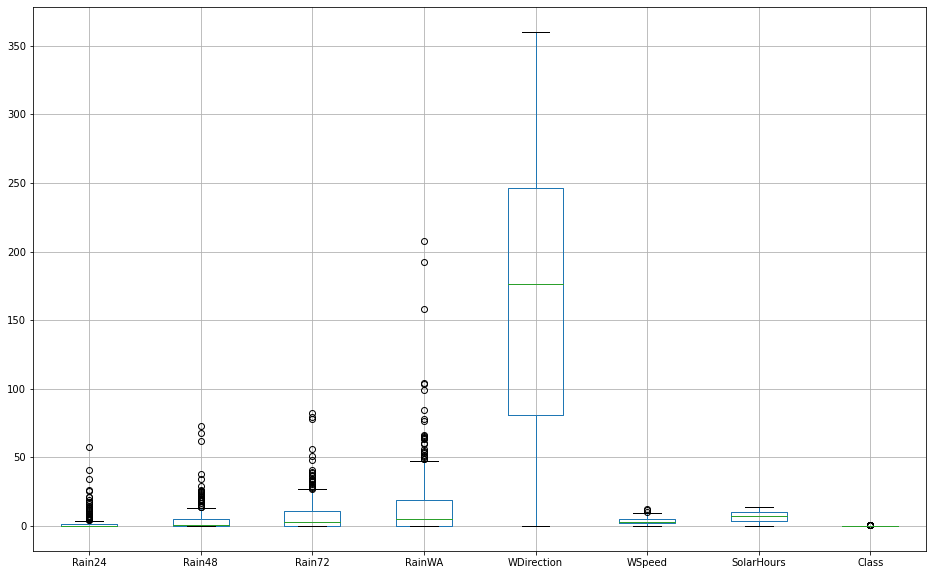

In [8]:
# Boxplot
figure = plt.figure()
clarks.boxplot()
figure.set_size_inches(16, 10)
figure.savefig(os.path.join(plot_path, 'boxplot'), bbox_inches='tight')

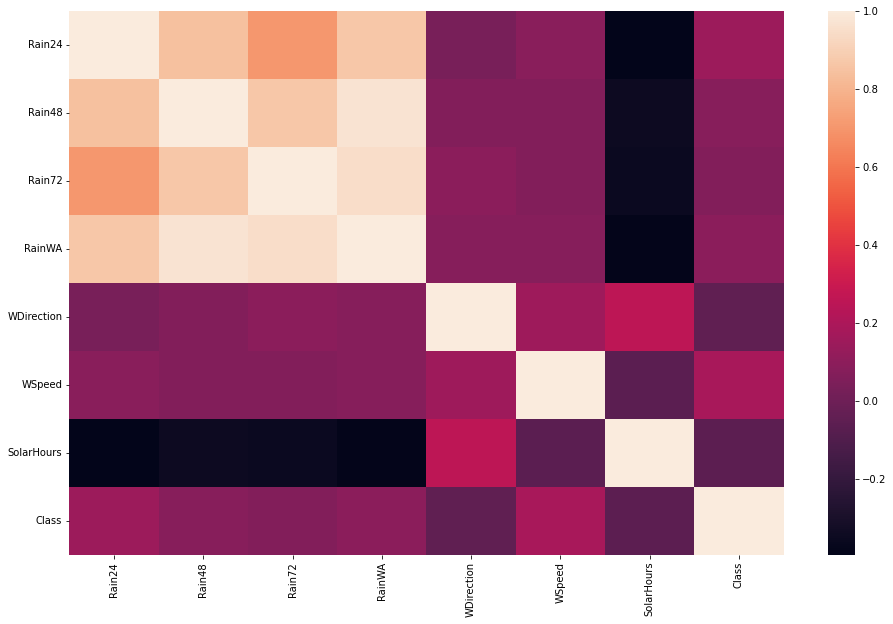

In [9]:
# Correlation heatmap
figure = sns.heatmap(clarks.corr()).get_figure()
figure.set_size_inches(16, 10)
figure.savefig(os.path.join(plot_path, 'correlation_heatmap'), bbox_inches='tight')

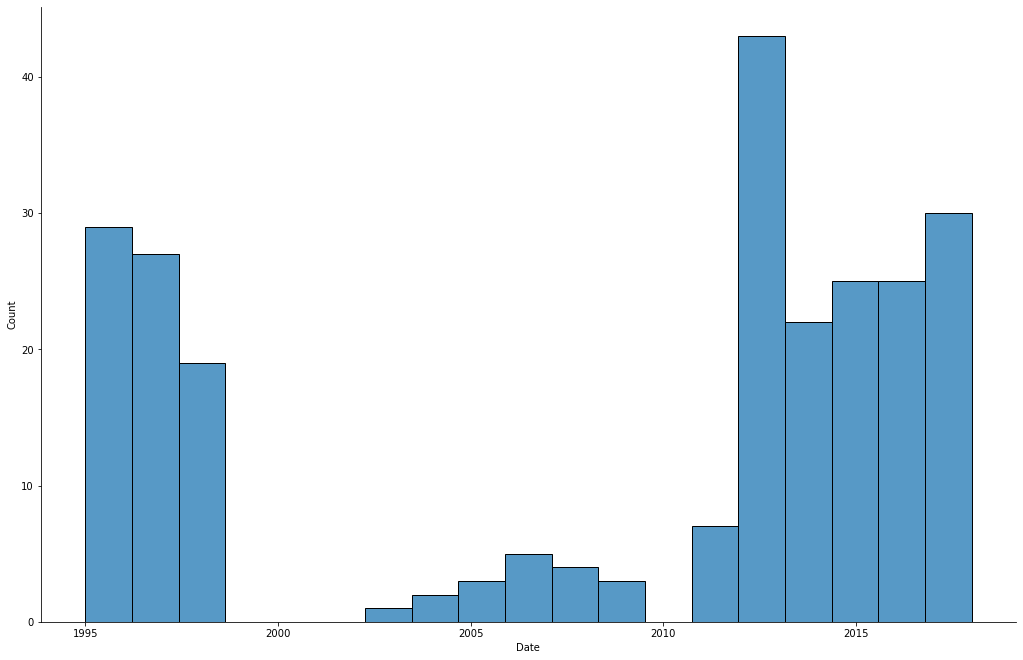

In [10]:
# Distribution plot
figure = sns.displot(clarks['Date'].dt.year, bins=len(np.unique(clarks['Date'].dt.year))).fig
figure.set_size_inches(16, 10)
figure.savefig(os.path.join(plot_path, 'sample_count'), bbox_inches='tight')

# Modelling

## KNN

In [19]:
# Split the train and test sets
X = clarks.iloc[:, 1:-1]
y = clarks.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=900)

# Run KNN
knn = KNeighborsClassifier()

# Fit the scaler to X_train and then use it to transform both train and test sets
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto',
                     leaf_size=30,
                     metric='minkowski',
                     metric_params=None,
                     n_jobs=1,
                     n_neighbors=5,
                     p=2,
                     weights='uniform')

# Show the KNN result
print("Predictions form the knn classifier:")
print(knn.predict(X_test))
print("Target values:")
print(y_test.values)
print("Accuracy:")
print(accuracy_score(y_test, knn.predict(X_test)))
print("F1 Score:")
print(f1_score(y_test, knn.predict(X_test)))

Predictions form the knn classifier:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Target values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:
1.0
F1 Score:
0.0


/Users/channing/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1570: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
